
# **Here are examples of using Decision Trees and Linear Regression on the Boston Housing Dataset**



About The Dataset:


## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

## Load the Dataset

In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [ ]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
# Here is about a Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

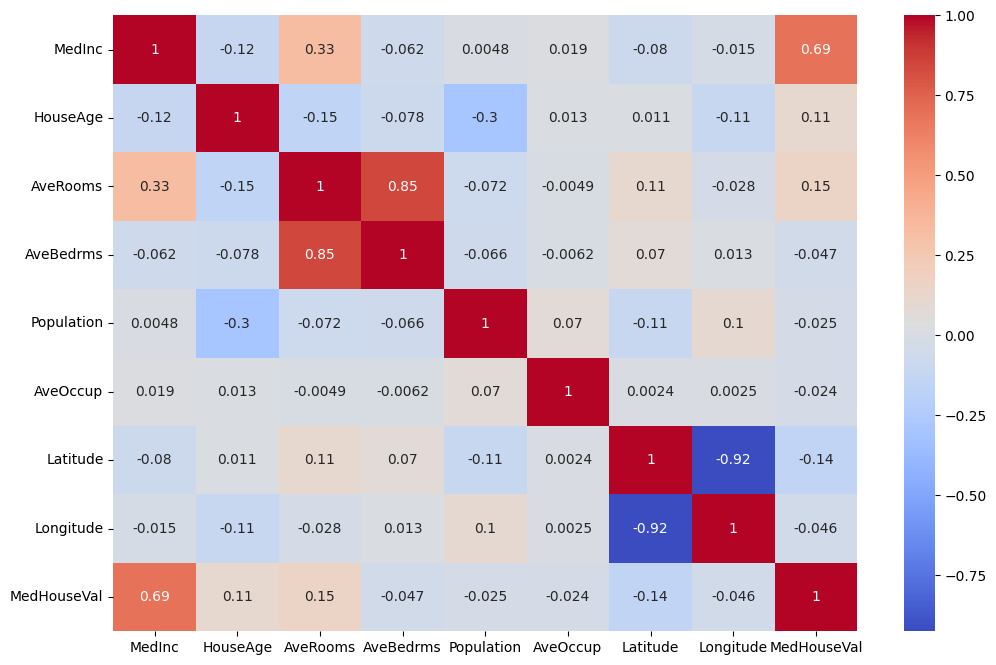

In [ ]:
# Here is a Heatmap ot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(df.shape)  # Before splitting

(20640, 9)


## Split Dataset into Training and Testing sets

In [ ]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [ ]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualization for the Relationships between features

Text(0, 0.5, 'Frequency')

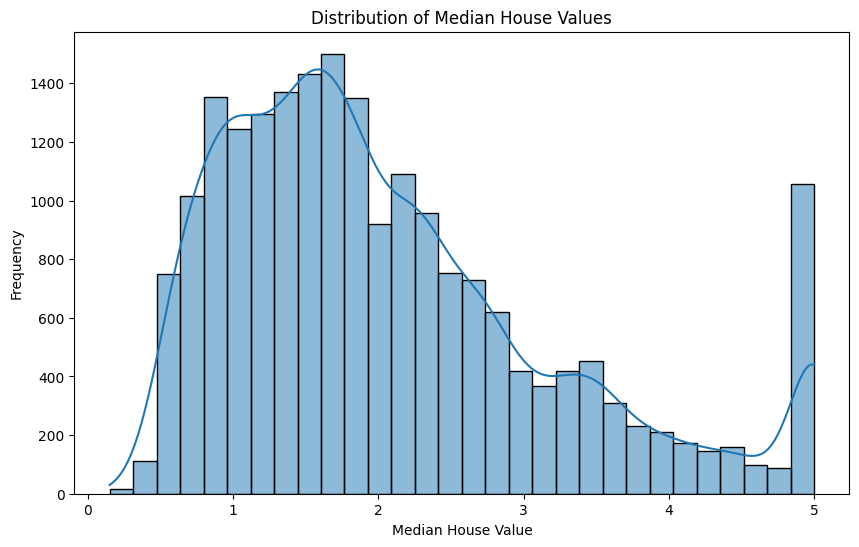

In [ ]:
# Here is about Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde= True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

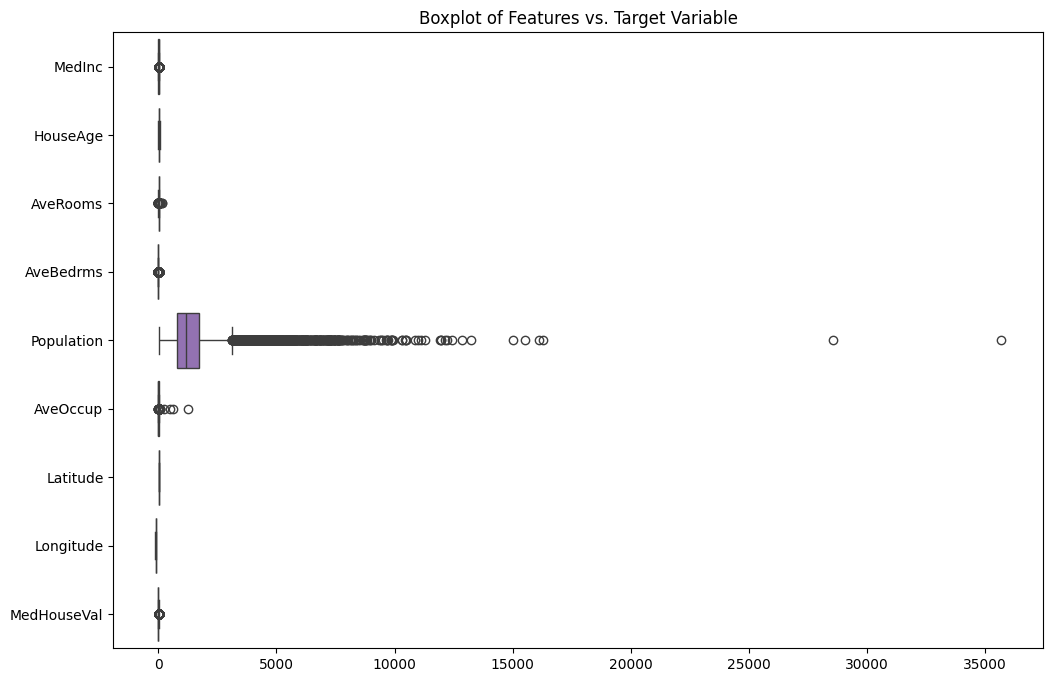

In [ ]:
# Here is a Boxplot of fratures vs. target variable
plt.figure(figsize=(12 , 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features vs. Target Variable')
plt.show()

Based on the Boxpolt there is some outliers, so by use the IQR.

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Here is Remove outliers from the 'Population' column
df_clean = remove_outliers(df, 'Population')
print(pd.DataFrame == df_clean.describe().T)

             count   mean    std    min    25%    50%    75%    max
MedInc       False  False  False  False  False  False  False  False
HouseAge     False  False  False  False  False  False  False  False
AveRooms     False  False  False  False  False  False  False  False
AveBedrms    False  False  False  False  False  False  False  False
Population   False  False  False  False  False  False  False  False
AveOccup     False  False  False  False  False  False  False  False
Latitude     False  False  False  False  False  False  False  False
Longitude    False  False  False  False  False  False  False  False
MedHouseVal  False  False  False  False  False  False  False  False


## Initialize and Train the Model

In [ ]:
# Example data
X = np.random.rand(20640, 8)
y = np.random.rand(20640,)

# Here is splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(16512, 8)
(16512,)


In [ ]:
# First use the DeciaionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model

DecisionTreeRegressor()

## Make the predictions

In [ ]:
y_pred = model.predict(X_test)

## Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Decision Tree Mean Squared Error: {mse}')

Decision Tree Mean Squared Error: 0.16836947803201158


## Apply the model on training data

In [ ]:
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, y_train)

In [ ]:
DT_reg

DecisionTreeRegressor(max_depth=6)

In [ ]:
print(DT_reg.score(X_train,y_train))
print(DT_reg.score(X_test,y_test))

0.01656060864801856
-0.02737769665653733


In [ ]:
y_pred=DT_reg.predict(X_test)
y_pred

array([0.49920498, 0.49920498, 0.49920498, ..., 0.49920498, 0.49920498,
       0.57325146])

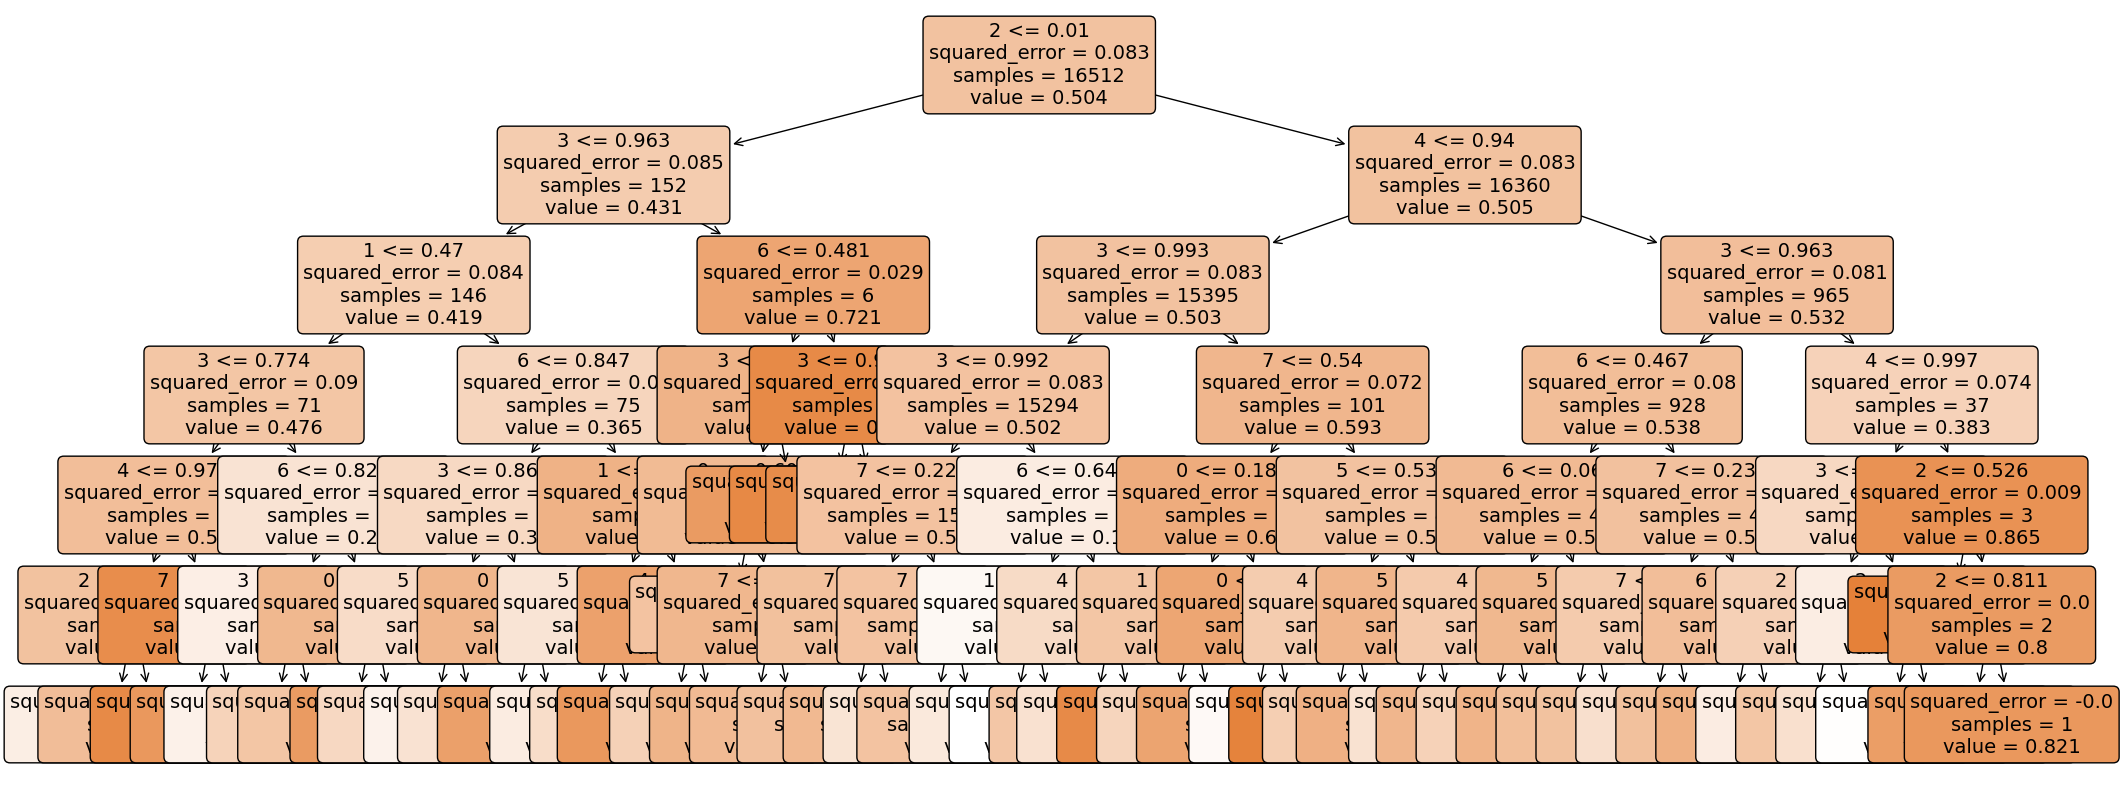

In [ ]:
# Here is for convert X and y to DataFrames because they are numPy arrays
X = pd.DataFrame(X)
y = pd.DataFrame(y)
plt.figure(figsize=(25, 10))
a = plot_tree(regressor,
              feature_names=X.columns,
              class_names=y.columns[0],
              filled=True,
              rounded=True,
              fontsize=14)
plt.show()

## Model Linear LinearRegression

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression

LinearRegression()

## Make the prediction

In [ ]:
y_pred_dt_train = dt_regressor.predict(X_train)
y_pred_dt_test = dt_regressor.predict(X_test)

## Evaluate the model

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')

Linear Regression Mean Squared Error: 0.08438748734446828


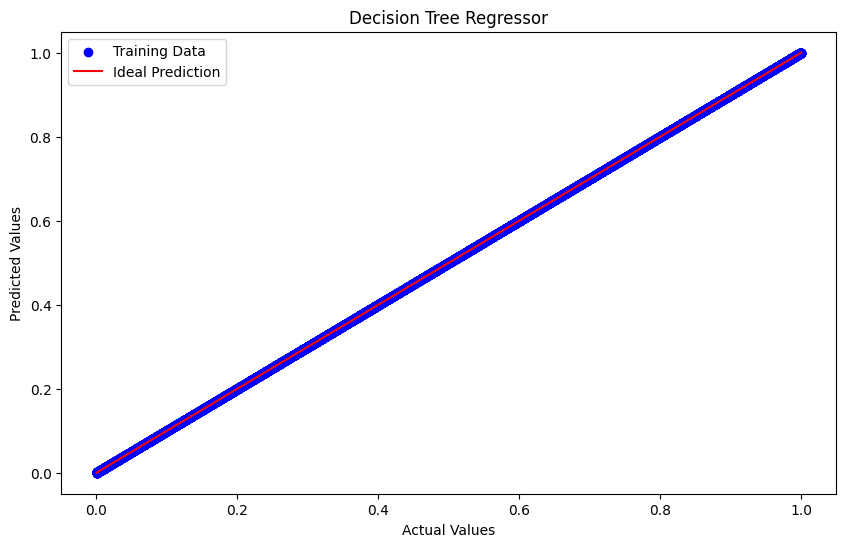

In [ ]:
# Here is a plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_dt_train, color='blue', label='Training Data')
plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
        [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
        color='red', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()